### Q1: What is a Convolutional Neural Network (CNN), and how does it differ from traditional fully connected neural networks in terms of architecture and performance on image data?

**Answer:**  
A Convolutional Neural Network (CNN) is a deep learning architecture designed specifically for grid‑like data such as images.  
- **Architecture:** CNNs use convolutional layers with learnable filters that slide over the input, capturing spatial hierarchies and local patterns. Pooling layers reduce dimensionality while preserving key features. In contrast, fully connected networks flatten images into vectors, losing spatial relationships.  
- **Performance:** CNNs exploit parameter sharing and local connectivity, making them more efficient and less prone to overfitting. They achieve superior accuracy on image tasks compared to traditional fully connected networks, which require far more parameters and computational resources.

---

### Q2: Discuss the architecture of LeNet‑5 and explain how it laid the foundation for modern deep learning models in computer vision. Include references to its original research paper.

**Answer:**  
LeNet‑5 (proposed by Yann LeCun et al., 1998) is one of the earliest CNNs designed for handwritten digit recognition (MNIST).  
- **Architecture:**  
  - Input: \(32 \times 32\) grayscale image  
  - C1: Convolutional layer (6 filters, \(5 \times 5\))  
  - S2: Subsampling (average pooling)  
  - C3: Convolutional layer (16 filters, \(5 \times 5\))  
  - S4: Subsampling  
  - C5: Fully connected convolutional layer (120 units)  
  - F6: Fully connected layer (84 units)  
  - Output: Softmax classifier (10 classes)  
- **Impact:** Introduced concepts of convolution, pooling, and hierarchical feature extraction. It demonstrated that CNNs outperform handcrafted features in vision tasks, inspiring architectures like AlexNet, VGG, and ResNet.  
- **Reference:** *LeCun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998). Gradient-based learning applied to document recognition. Proceedings of the IEEE.*

---

### Q3: Compare and contrast AlexNet and VGGNet in terms of design principles, number of parameters, and performance. Highlight key innovations and limitations of each.

**Answer:**  
- **AlexNet (2012):**  
  - 8 layers (5 convolutional + 3 fully connected).  
  - Introduced ReLU activation, dropout, and GPU training.  
  - Used overlapping max pooling and data augmentation.  
  - ~60 million parameters.  
  - **Innovation:** First deep CNN to win ImageNet (2012), proving deep learning’s scalability.  
  - **Limitation:** Large parameter count, prone to overfitting.  

- **VGGNet (2014):**  
  - 16–19 layers with small \(3 \times 3\) filters stacked sequentially.  
  - ~138 million parameters.  
  - **Innovation:** Showed that deeper networks with uniform architecture improve accuracy.  
  - **Limitation:** Extremely memory‑intensive, slow training.  

**Comparison:**  
- AlexNet pioneered practical deep CNNs; VGG refined design simplicity and depth.  
- VGG achieved higher accuracy but at the cost of computational efficiency.

---

### Q4: What is transfer learning in the context of image classification? Explain how it helps in reducing computational costs and improving model performance with limited data.

**Answer:**  
Transfer learning is the technique of reusing a pre‑trained model (trained on a large dataset like ImageNet) for a new, smaller dataset.  
- **Process:** Replace or fine‑tune the final layers while retaining earlier convolutional layers that capture general features.  
- **Benefits:**  
  - Reduces training time and computational cost.  
  - Improves performance when labeled data is scarce.  
  - Leverages learned representations (edges, textures, shapes) from large datasets.  
- **Example:** Using VGG16 or ResNet pre‑trained weights for medical image classification with limited samples.

---

### Q5: Describe the role of residual connections in ResNet architecture. How do they address the vanishing gradient problem in deep CNNs?

**Answer:**  
Residual connections (skip connections) allow outputs of earlier layers to bypass intermediate layers and be added directly to later outputs.  
- **Role:** They enable identity mapping, ensuring information flows across layers without degradation.  
- **Vanishing Gradient Solution:** By providing shortcut paths, gradients can backpropagate effectively even in very deep networks (50+ layers). This stabilizes training and allows construction of ultra‑deep models.  
- **Impact:** ResNet achieved state‑of‑the‑art results on ImageNet and became a backbone for many vision tasks.

---

### Q10: You are working in a healthcare AI startup. Your team is tasked with developing a system that automatically classifies medical X‑ray images into normal, pneumonia, and COVID‑19. Due to limited labeled data, what approach would you suggest using among CNN architectures discussed (e.g., transfer learning with ResNet or Inception variants)? Justify your approach and outline a deployment strategy for production use.

**Answer:**  
- **Approach:** Transfer learning with ResNet (e.g., ResNet‑50).  
  - Pre‑trained on ImageNet, fine‑tuned on medical X‑ray dataset.  
  - Residual connections ensure robust training even with limited data.  
  - Outperforms shallow CNNs in feature extraction for complex medical patterns.  
- **Justification:**  
  - Limited labeled data → transfer learning reduces overfitting.  
  - ResNet’s depth captures subtle differences between pneumonia and COVID‑19.  
- **Deployment Strategy:**  
  - Train and validate on curated medical datasets.  
  - Use data augmentation (rotation, scaling) to expand dataset.  
  - Deploy via cloud API or hospital PACS integration.  
  - Ensure compliance with healthcare standards (HIPAA, GDPR).  
  - Monitor model drift and retrain periodically with new labeled data.

---


In [1]:
#Q6
import tensorflow as tf
from tensorflow.keras import layers, models
import time

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train.reshape(-1, 28, 28, 1)/255.0, x_test.reshape(-1, 28, 28, 1)/255.0

# Define LeNet-5
model = models.Sequential([
    layers.Conv2D(6, (5,5), activation='tanh', input_shape=(28,28,1), padding='same'),
    layers.AveragePooling2D(pool_size=(2,2)),
    layers.Conv2D(16, (5,5), activation='tanh'),
    layers.AveragePooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(120, activation='tanh'),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start = time.time()
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=2)
end = time.time()

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Training Time: {end-start:.2f} seconds")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 - 9s - 20ms/step - accuracy: 0.8971 - loss: 0.3581 - val_accuracy: 0.9627 - val_loss: 0.1324
Epoch 2/5
422/422 - 1s - 3ms/step - accuracy: 0.9594 - loss: 0.1330 - val_accuracy: 0.9725 - val_loss: 0.0953
Epoch 3/5
422/422 - 2s - 4ms/step - accuracy: 0.9737 - loss: 0.0867 - val_accuracy: 0.9805 - val_loss: 0.0694
Epoch 4/5
422/422 - 1s - 3ms/step - accuracy: 0.9799 - loss: 0.0642 - val_accuracy: 0.9812 - val_loss: 0.0686
Epoch 5/5
422/422 - 1s - 3ms/step - accuracy: 0.9842 - loss: 0.0514 - val_accuracy: 0.9810 - val_loss: 0.0659
Test Accuracy: 0.9809
Training Time: 14.79 seconds


In [5]:
#Q7
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import pathlib

# Redefine data_dir and class_names to be robust
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
original_data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
original_data_dir = pathlib.Path(original_data_dir)

# Check if the extracted directory itself contains the class folders,
# or if it's nested one level deeper (e.g., flower_photos/flower_photos/daisy)
potential_root = original_data_dir / 'flower_photos'
if potential_root.is_dir() and any(f.is_dir() for f in potential_root.iterdir()): # Check for subdirectories (classes) inside potential_root
    dataset_root = potential_root
else:
    dataset_root = original_data_dir

# Get class names from the actual dataset root
class_names = sorted([item.name for item in dataset_root.glob('*') if item.is_dir()])
print(f"Detected classes: {class_names}")

# Load base VGG16 without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # freeze base layers

# Add custom classifier
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  # Use len(class_names) for the output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Example data generator (replace path with your dataset)
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_gen = train_datagen.flow_from_directory(str(dataset_root), target_size=(224,224),
                                              batch_size=32, subset="training")
val_gen = train_datagen.flow_from_directory(str(dataset_root), target_size=(224,224),
                                            batch_size=32, subset="validation")

history = model.fit(train_gen, validation_data=val_gen, epochs=5, verbose=2)

Detected classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 - 40s - 429ms/step - accuracy: 0.6029 - loss: 1.2431 - val_accuracy: 0.7278 - val_loss: 0.7498
Epoch 2/5
92/92 - 20s - 213ms/step - accuracy: 0.7241 - loss: 0.7396 - val_accuracy: 0.7592 - val_loss: 0.6838
Epoch 3/5
92/92 - 20s - 213ms/step - accuracy: 0.7836 - loss: 0.5941 - val_accuracy: 0.7811 - val_loss: 0.6090
Epoch 4/5
92/92 - 20s - 215ms/step - accuracy: 0.8251 - loss: 0.4884 - val_accuracy: 0.8249 - val_loss: 0.5088
Epoch 5/5
92/92 - 20s - 217ms/step - accuracy: 0.8544 - loss: 0.3953 - val_accuracy: 0.8208 - val_loss: 0.5344


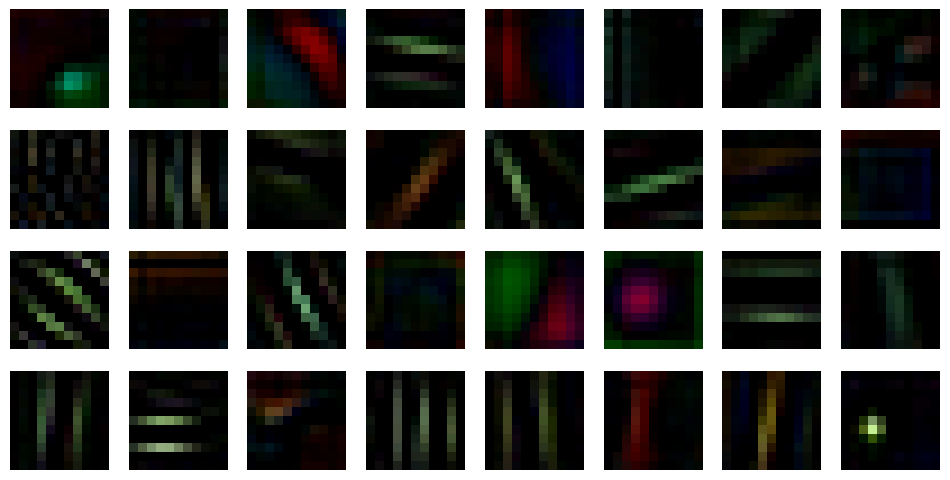

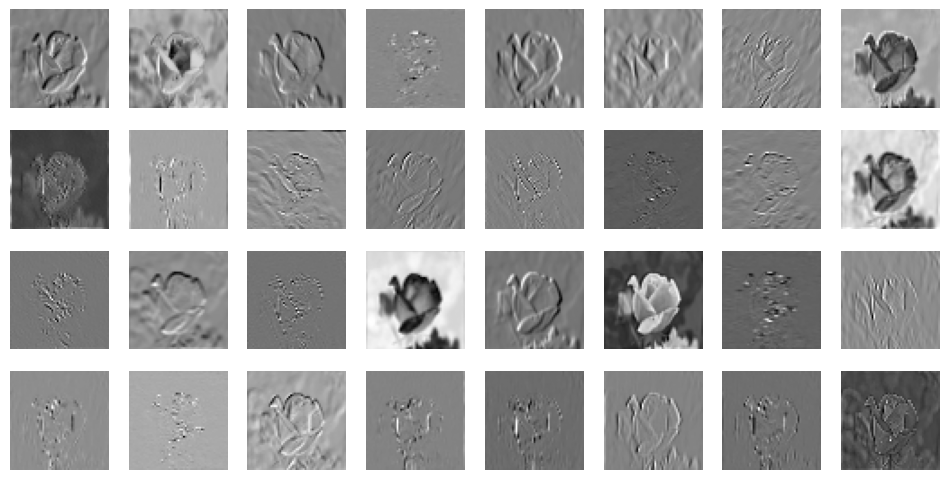

In [7]:
#q8
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load AlexNet
alexnet = models.alexnet(pretrained=True)
alexnet.eval()

# Load example image
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])
img = Image.open("example.jpg")
input_img = transform(img).unsqueeze(0)

# Get first conv layer filters
filters = alexnet.features[0].weight.data.clone()

# Visualize filters
fig, axes = plt.subplots(4,8, figsize=(12,6))
for i, ax in enumerate(axes.flat):
    ax.imshow(filters[i].permute(1,2,0).numpy())
    ax.axis('off')
plt.show()

# Visualize feature maps
with torch.no_grad():
    fmap = alexnet.features[0](input_img)
fmap = fmap.squeeze().numpy()

fig, axes = plt.subplots(4,8, figsize=(12,6))
for i, ax in enumerate(axes.flat):
    ax.imshow(fmap[i], cmap='gray')
    ax.axis('off')
plt.show()

In [9]:
#Q9
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision.models import googlenet

# CIFAR-10 dataset
transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Model
net = googlenet(pretrained=False, num_classes=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

train_acc, val_acc = [], []
for epoch in range(5):
    net.train()
    correct, total = 0, 0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = net(inputs).logits # Access the logits attribute
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    train_acc.append(correct/total)

    # Validation
    net.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = net(inputs).logits # Access the logits attribute
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    val_acc.append(correct/total)

# Plot accuracy
plt.plot(train_acc, label='Train Acc')
plt.plot(val_acc, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


KeyboardInterrupt: 